# Setup

In [1]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.3 MB/s eta 0:00:00


In [2]:
#!pip install numpy pandas yfinance matplotlib statsmodels pmdarima

import math
import pandas as pd
import numpy as np
from statsmodels.tsa.base.tsa_model import TimeSeriesModel
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression
# import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns


In [10]:
cocoa_price_raw = pd.read_csv("/content/Daily Prices_ICCO.csv")
cocoa_price_raw.columns.values[1] = "PRICE"
cocoa_price_raw.columns.values[0] = "DATE"
cocoa_price_raw['DATE'] = pd.to_datetime(cocoa_price_raw['DATE'])
cocoa_price_raw['PRICE'] = cocoa_price_raw['PRICE'].astype(str).str.replace(',', '').astype(float)
#Sorting
cocoa_price = cocoa_price_raw.sort_values(by='DATE').reset_index(drop = True)

cocoa_price['returns'] = np.log(cocoa_price['PRICE'] / cocoa_price['PRICE'].shift(1))
cocoa_price = cocoa_price.dropna()


cocoa_price


# remove duplicate
date_to_remove1 = '31/01/2024'
price_to_remove1 = '10,888.05'
date_to_remove2 = '30/01/2024'
price_to_remove2 = '10,676.42'


cocoa_price['DATE'] = pd.to_datetime(cocoa_price['DATE'], format='%d/%m/%Y', errors='coerce')

price_column = 'PRICE'
cocoa_price[price_column] = cocoa_price[price_column].astype(str).str.replace(',', '', regex=False)
cocoa_price[price_column] = pd.to_numeric(cocoa_price[price_column])


price_remove1_numeric = float(price_to_remove1.replace(',', ''))
price_remove2_numeric = float(price_to_remove2.replace(',', ''))


date_remove1_datetime = pd.to_datetime(date_to_remove1, format='%d/%m/%Y', errors='coerce')
date_remove2_datetime = pd.to_datetime(date_to_remove2, format='%d/%m/%Y', errors='coerce')


mask_to_remove = (
    ((cocoa_price['DATE'] == date_remove1_datetime) & (cocoa_price[price_column] == price_remove1_numeric)) |
    ((cocoa_price['DATE'] == date_remove2_datetime) & (cocoa_price[price_column] == price_remove2_numeric))
)


cocoa_price_cleaned = cocoa_price[~mask_to_remove].copy()



cocoa_price = cocoa_price_cleaned



<ipython-input-10-0d94942b9495>:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cocoa_price_raw['DATE'] = pd.to_datetime(cocoa_price_raw['DATE'])


In [11]:
# Summary Statistics
if 'DATE' in cocoa_price.columns:

    cocoa_price_2023_2025 = cocoa_price[cocoa_price['DATE'] >= '2023-01-01'].copy()

else:

    print("ERROR: 'DATE' not found.")

    cocoa_price_2023_2025 = None

if cocoa_price_2023_2025 is not None:

    if 'PRICE' not in cocoa_price_2023_2025.columns:

        print(f"ERROR: 'PRICE' not found.")

    else:

        cocoa_price_2023_2025['PRICE'] = cocoa_price_2023_2025['PRICE'].astype(str).str.replace(',', '', regex=False)

        cocoa_price_2023_2025['PRICE'] = pd.to_numeric(cocoa_price_2023_2025['PRICE'])


        count = cocoa_price_2023_2025['PRICE'].count()
        mean = cocoa_price_2023_2025['PRICE'].mean()
        std_dev = cocoa_price_2023_2025['PRICE'].std()
        min = cocoa_price_2023_2025['PRICE'].min()
        q1 = cocoa_price_2023_2025['PRICE'].quantile(0.25)
        median = cocoa_price_2023_2025['PRICE'].median()
        q3 = cocoa_price_2023_2025['PRICE'].quantile(0.75)
        max = cocoa_price_2023_2025['PRICE'].max()


        print(f"Summary Statistics of the Cocoa Futures Prices:")
        print(f"Count: {count}")
        print(f"Mean: {mean:.2f} US$/tonne")
        print(f"Standard Deviation: {std_dev:.2f} US$/tonne")
        print(f"Minimum: {min:.2f} US$/tonne")
        print(f"25th Percentile (Q1): {q1:.2f} US$/tonne")
        print(f"Median (Q2): {median:.2f} US$/tonne")
        print(f"75th Percentile (Q3): {q3:.2f} US$/tonne")
        print(f"Maximum (Q4): {max:.2f} US$/tonne")

Summary Statistics of the Cocoa Futures Prices:
Count: 554
Mean: 5700.43 US$/tonne
Standard Deviation: 2680.78 US$/tonne
Minimum: 2484.48 US$/tonne
25th Percentile (Q1): 3329.03 US$/tonne
Median (Q2): 4860.27 US$/tonne
75th Percentile (Q3): 7511.02 US$/tonne
Maximum (Q4): 11984.66 US$/tonne


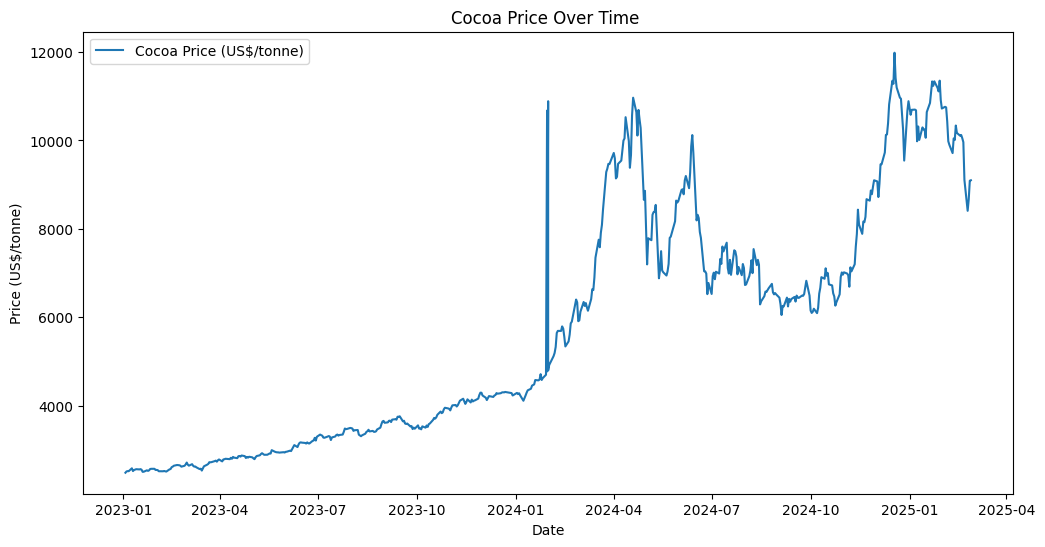

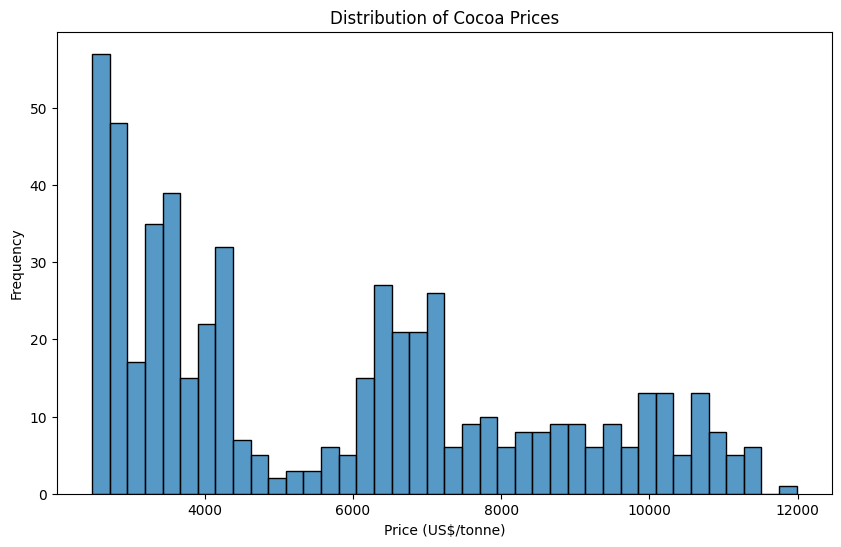

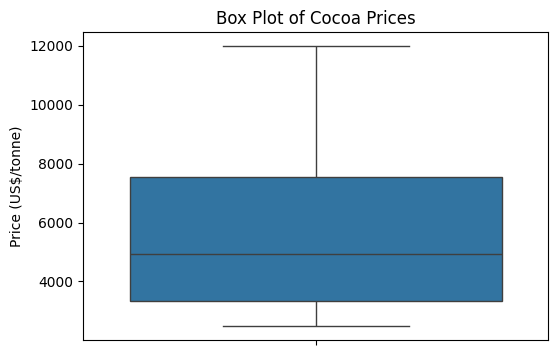

In [6]:

# time series
plt.figure(figsize=(12, 6))
plt.plot(cocoa_price_2023_2025['DATE'], cocoa_price_2023_2025['PRICE'], label='Cocoa Price (US$/tonne)')
plt.title('Cocoa Price Over Time ')
plt.xlabel('Date')
plt.ylabel('Price (US$/tonne)')
plt.legend()
plt.show()

# Historgram
plt.figure(figsize=(10, 6))
sns.histplot(cocoa_price_2023_2025['PRICE'], bins = 40)
plt.title('Distribution of Cocoa Prices')
plt.xlabel('Price (US$/tonne)')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(6, 4))
sns.boxplot(y = cocoa_price_2023_2025['PRICE'])
plt.title('Box Plot of Cocoa Prices')
plt.ylabel('Price (US$/tonne)')
plt.show()
